To open my github repository go to:
https://github.com/joeoettinger/
It contains the notebook: 
bayes_talk.ipynb (click on bayes_talk)
and it also contains 2 modules
bayeslib.py 
bayesinit.py

# __"Students learn an enormous amount by being forced to teach the computer how to solve a given problem. Much of the teaching of math and science consists in the development of algorithms, or recipes, for the solution of problems. ... we have seen hundreds of examples of spectacular success of learning through teaching the computer."__
- Janos Gyögi Kemény (John George Kemeny) - Jewish-Hungarian American mathematician, inventor of BASIC, in "Man and the Computer" (c) 1972 p79

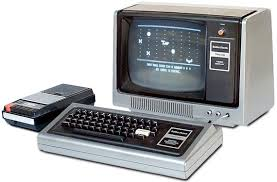

In [1]:
from IPython.display import Image
Image(filename=("trs-80.jpeg"))


# "The critical point about Bayesian inference, then, is that it provides a principled way of combining new evidence with prior beliefs, through the application of Bayes' rule. (Contrast this with frequentist inference, which relies only on the evidence as a whole, with no reference to prior beliefs.)"

https://en.wikipedia.org/wiki/Bayesian_inference


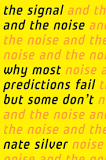

In [2]:
from IPython.display import Image
Image(filename=("signal.png"))


# "Finding patterns is easy in any kind of data-rich environment ... The key is finding whether patterns represent noise or signal [hence the book's title]. ... And although there isn't any one particular key ... there is one particular type of thought process ... that helps govern decisions. It's called Bayesian reasoning."
- Nate Silver, the signal and the Noise

# "[With reference to] Research objectives: State the objectives of the research, CLEARLY DISTINGUISHING PRE-SPECIFIED HYPOTHESES FROM HYPOTHESES SUGGESTED AFTER INITIATION OF THE DATA ANALYSES."
http://stm.sciencemag.org/content/instructions-authors-new-research-articles


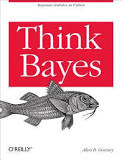

In [3]:
from IPython.display import Image
Image(filename=("thinkbayes.jpeg"))

# Allen Downey's book

# Bayes' Rule

# P(H|D) = (P(D|H) * P(H)) / P(D)

# "Give me one example. I can't understand anything in general unless I'm carrying along in my mind a specific example and watching it go."- Richard Feynman

# So here's a specific example:

# There are 2 jars of cookies: jar0 with 30 vanilla and 10 chocolate, and jar1 with 20 of each. 
# You pick a jar at random, then pick a cookie from it at random. It's vanilla. 
# What's the chance it came from jar0? What's the chance it came from jar1?

 
#
# So what do the terms of Bayes' equation mean?
# 



# P(H|D) = (P(D|H) * P(H)) / P(D)

# H stands for the hypothesis, eg "the jar you picked is jar0"

# D stands for the datum (the evidence, the outcome of a simple trial), eg "the cookie you picked is vanilla".

# P(H) just means "the probability that the hypothesis is true", eg "the probability that you picked jar0". 

# P(D|H) means "the the probability that the datum will be true GIVEN that the hypothesis is true", eg "the probability that the cookie you pick will be vanilla given that you picked jar0". 

# P(D) means "the probability that the datum is true", eg "the probability that you'll pick a vanilla cookie" - That's whether you pick jar0 or jar1. 

# * (You can calculate P(D) by adding two probabilties:
# The probability that you picked jar0 then picked vanilla from it 
# PLUS
# The probability that you picked jar1 then picked vanilla from it)   

# P(H|D) means "the probabilty that the hypothesis is true given that the datum is true", eg "the probability that the jar you picked is jar0 given that the cookie you picked from it is vanilla". (That's what you want to find out.)



# P(H|D) = (P(D|H) * P(H)) / P(D)

# (Actually these terms usually refer to distributions, not single probabilities.
# This is one of the first things to learn about Bayesian probability: 
# Although the terms of the equation can be single probabilities, almost always they apply to probability DISTRIBUTIONS (a graph of a probability distribution has the hypotheses on the x-axis and the probabilities on the y axis). We'll get into that a little later, when we write a program.)

# DERIVATION



# Let A and B be any events (or observations); & means 'and'; | means 'given'

# P(A&B) == P(A|B) * P(B) <br /> (the  axiom of conditional probability) 
# P(B&A) == P(B|A) * P(A) <br /> (since A and B can be any events, you can (consistently) replace event A by event B and B by A)
# P(A&B) == P(B&A)  <br /> (symbolic logic: conjunction is commutative) 
# P(A|B) * P(B) == P(B|A) * P(A)  <br /> (one of Euclid's axioms - things equal to the same thing are equal to each other; you have to apply it twice)
# P(H|D) * P(D) == P(D|H) * P(H)  <br />( just substituting usual Bayes' notation for the events)
# P(H|D) == (P(D|H) * P(H)) / P(D)  <br /> (just divide by P(D))


# questions???

# EQUIVALENT PYTHON VARIABLES:
# To go straight from the terms of the equation to python variables which tell you immediately what the variables meant, I decided to represent them in all my programs like this :

# P(H|D)   :       phgd        <br /> "probabilities of hypotheses given datum" 
# P(D|H)   :      pdgh         <br /> "probabilities of datum given hypotheses"
# P(H)       :       ph            <br /> "probabilities of hypotheses"
# P(D)       :       pd            <br /> "probability of datum"

# So here's bayes equation in logical symbols, and then in Python variables:


# P(H|D) == (P(D|H)*(P|H)) / P(D)
# phgd   == (pdgh*ph)       / pd

# -------------------------------------------------------------------------------

# (and it's easiest from the beginning to look at these variables as probability distributions, not simple numbers). And in Python, I represented distributions by lists). <br /> Each hypothesis is represented by the order of the element in the list ph[0] or ph[1] and the probability by the floating point value of that element. <br /> So ph[0] represents the probability you picked jar0.

# So before looking at the Python program, this is the cookie problem again:
# There are 2 jars of cookies, jar0 with 30 choc and 10 van, jar1 with 20 of each. You pick a jar a random, then pick a cookie from it at random.
# It's vanilla. What's the chance it came from jar0? What's the chance it came from jar1? (Notice I called them jar0 and jar1 instead of 1 and 2. That's in order to be consistent with their order in arrays and lists.) 


# TABLE TO ILLUSTRATE BAYES EQUATION LISTS
# (uses Downey's cookie problem as an example)

# P(H|D) = (P(D|H) x P(H)) / PD 

# phgd ==  (pdgh   * ph  )/ pd
#
#
# term               jar0                jar1                 list
____            ____            ____            ____

# ph                  1/2                  1/2                   ph == [0.5, 0.5]

# pdgh              30/40              20/40               pdgh == [0.75, 0.5]

# pdgh*ph        (1/2)*(30/40)   (1/2)*(20/40)   pdgh_t_ph == [0.375, 0.25]

# pdgh_ph/pd   0.375/0.625     0.25/0.625     phgd == [0.6, 0.4] ¹

# ¹  pd = sum(pdgh_t_ph) == 0.375 + 0.25 == 0.625

P(H|D)  is  [0.6, 0.4]


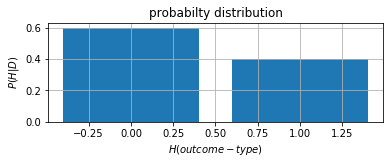

In [4]:
# democookiesimp.py 2016-07-01 06:34:19 joseph t oettinger
# purpose/description: a program to solve a simple bayes problem
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: 
# Here's the problem the program solves.
# There are 2 jars of cookies: jar0 with 30 vanilla and 10 chocolate, 
# jar1 with 20 of each.
# You pick a jar at random, then pick a cookie from it at random. It's vanilla.
# What's the chance it came from jar0? What's the chance it came from jar1?
# The problem is from Allen Downey's book Think Bayes.
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

import bayeslib

def init_uni_ph_w_arg(num_h):
    """ From the number of hypotheses (the function's argument) calculate 
    their initial uniform probability (priors).
    arg: num_h, the number of hypotheses
    return value: ph, a list of num_h probabilites, each == 1/num_h 
    """
    ph = [1/num_h]*num_h
    return (ph)


def calc_pdgh_from_counts(ph, poss_successes_in_h, poss_failures_in_h):
    """ From the hypothesis list and the number of possible  successes and
    possible failures given each hpothesis, calculate the prob of data given
    hypothesis (pdgh).
    """ 
    num_h = len(ph)
    pdgh=[0]*num_h
    for i in range(0,num_h):
        pdgh[i] = poss_successes_in_h[i]/(poss_successes_in_h[i] + poss_failures_in_h[i])
    return pdgh

def success_update(ph, pdgh):
    """Update a probability distribution of a set of hypotheses given the
    occurence of (a certain binary outcome, which is called the data). The
    occurrence of that outcome can be called a success.
    parameters:
    p_h     -- list of each of the probabilities of each of the hypotheses P(H)
    (eg 'you blindly selected jar 1 to pick a cookie from' or 'the coin is
    biased, so that 90% of the time it comes up heads.')
    p_d_g_h -- a corresponding list of the probabilities of the data, ie of an 
    outcome (eg an outcome such as 'you blindly picked a chocolate cookie from
    the jar' or 'the coin came up heads') given each of the hypotheses P(D|H)
    return value:
    p_h_g_d -- corresponding list of the probabilities of the hypotheses given
    the data - the left side of Bayes equation.
    """
    num_h = len(ph)
    pdgh_t_ph = [0]*num_h
    for i in range(0, num_h):
        pdgh_t_ph[i] = (pdgh[i]) * ph[i]
    return pdgh_t_ph

def calc_phgd(pdgh_t_ph):
    """ Normalize the numerator pdgh_t_ph  ie P(D|H) * P(H) 
    to produce p_h_g_d ie P(H|D)
    """
    num_h = len(pdgh_t_ph)
    pd = sum(pdgh_t_ph)
    phgd = [0]*num_h
    for i in range(0, num_h): 
        phgd[i] = pdgh_t_ph[i]/pd
    return(phgd)


# num_h is the number of hypotheses. There are 2 hypotheses:
# "the jar you picked is jar0" and "the jar you picked is jar1".
num_h = 2

# Assign uniform values to members of list ph.
ph = init_uni_ph_w_arg(num_h)

# Assign the possible successes and possible failuref for each hypothesis.
# possible successes in jar0 is 30; possible successes in jar1 is 20
poss_successes_in_h = [30, 20]
# possible failures in jar0 is 10; possible failures in jar1 is 20
poss_failures_in_h  = [10, 20]

#### The rest of the lines of code up to graph distro function could be put in
# a for loop the ath updating repeated. 

pdgh = calc_pdgh_from_counts(ph, poss_successes_in_h, poss_failures_in_h)

# If you'd picked a chocolate cookie, you'd use a failure_update(ph, pdgh)
# function instead of the following success_update(ph, pdgh).
# The only difference is that it would use (1-pdgh[i]) in the for loop. 
# That's because the probability of picking a choc from the jar is 
# (1-the prob of getting a vanilla). The failure update function is in
# the module bayeslib.py in this repository.
pdgh_t_ph = success_update(ph, pdgh)

# Calculate the posterior.
phgd = calc_phgd(pdgh_t_ph)

# Make the posterior the new prior.
ph = phgd

print("P(H|D)  is ", phgd)

####

bayeslib.graph_distro(phgd)


#if __name__ == '__main__':
#    main(*sys.argv)


# "... BAYES' RULE can be applied iteratively [repeatedly]: after observing some evidence, the resulting posterior probability [phgd] can then be treated as a prior probability [ph], and a new phgd computed from new evidence. This allows for Bayesian principles to be applied to various kinds of evidence, whether viewed all at once or over time. This procedure is termed 'Bayesian updating".
# - wikipedia article on bayesian inference


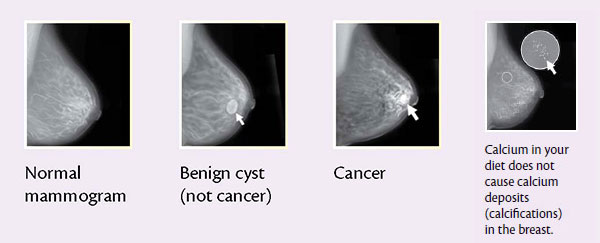

In [5]:
from IPython.display import Image
Image(filename=("MammoGram-Seriesshow.jpg"))

phgd is  [0.09394572025052193, 0.906054279749478]


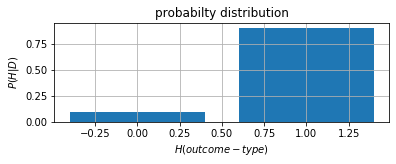

In [6]:
# bayesbrcalib.py 2016-05-22 07:51:17 joseph t oettinger
# purpose/description: calc chance pt with pos mam has br CA
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: 
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

import bayeslib
import bayesinit

ph =   bayesinit.init_ca_ph()
pdgh = bayesinit.init_ca_pdgh()
pdgh_t_ph = bayeslib.success_update(ph, pdgh)
phgd = bayeslib.calc_phgd(pdgh_t_ph)
print('phgd is ', phgd)
bayeslib.graph_distro(phgd)

#if __name__ == '__main__':
#    main(*sys.argv)

# There's a dismaying article about doctors' estimate of pt risk of br CA by Steven Strogatz: "Chances Are" you can read it online here:

# http://opinionator.blogs.nytimes.com/2010/04/25/chances-are/?_r=0


enter number of success updates  2
enter number of failure updates  1


phgd is  [0.0, 1.1881188118811874e-05, 4.704470447044702e-05, 0.00010477047704770469, 0.00018433843384338424, 0.0002850285028502849, 0.0004061206120612058, 0.0005468946894689467, 0.0007066306630663063, 0.000884608460846084, 0.0010801080108010796, 0.0012924092409240919, 0.0015207920792079195, 0.0017645364536453636, 0.0020229222922292225, 0.0022952295229522936, 0.0025807380738073794, 0.0028787278727872775, 0.003188478847884787, 0.0035092709270927083, 0.003840384038403839, 0.004181098109810979, 0.004530693069306929, 0.004888448844884487, 0.00525364536453645, 0.005625562556255622, 0.0060034803480348, 0.006386678667866784, 0.006774437443744372, 0.00716603660366036, 0.007560756075607555, 0.007957875787578754, 0.008356675667566753, 0.008756435643564351, 0.00915643564356435, 0.00955595559555955, 0.009954275427542748, 0.010350675067506745, 0.010744434443444341, 0.01113483348334833, 0.011521152115211514, 0.011902670267026698, 0.012278667866786675, 0.012648424842484244, 0.013011221122112206, 0.01

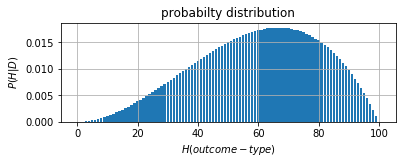

In [8]:
# bayescoinlib.py 2016-05-10 06:54:02 joseph t oettinger
# purpose/description: write euro part of updater with libs 
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: 
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

%matplotlib inline

import bayeslib
import bayesinit


ph = bayesinit.init_percent_ph()
pdgh = bayesinit.init_percent_pdgh(ph)
phgd = bayeslib.input_calc_updates(ph, pdgh)
print('phgd is ', phgd)
bayeslib.graph_distro(phgd)



#if __name__ == '__main__':
#    main(*sys.argv)


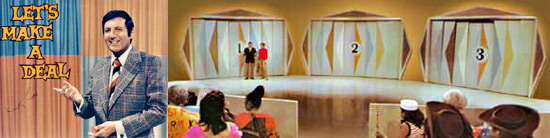

In [9]:
from IPython.display import Image
Image(filename=("montydoors.jpg"))

# Here are the Rules of the game:
# There are 3 doors.
# Behind 2 of the doors are goats; behind one of them is a car.
# The contestant chooses a door (call that doorA).
# If the car is behind the door the contestant chooses, Monty picks one of the other doors at random (call the one he picks at random doorB) and shows that there's a goat behind it.
# If a goat is behind the door the contestant chooses (behind doorA), Monty picks the door with the other goat behind it and shows the goat.

# The contestant now is given the option to switch his choice to the other closed door.
# If contestant picks the door with the car behind it, he gets the car. Should he switch?

TABLE TO ILLUSTRATE BAYES EQUATION LISTS
uses the Monty Hall problem as an example)

P(H|D) = (P(D|H) x P(H)) / P(D) 

phgd ==  (pdgh   * ph  )/ pd


doorA            doorB        doorC        list
____            ____            ____            ____

1/3             1/3            1/3         ph == [0.33333, 0.3333]

1/2             0              1           pdgh == [.5, 0, 1]

(1/2)*(1/3)    0*(1/3)          1*(1/3)    pdgh_t_ph == [1/6, 0, 1/3]

(1/6)/(1/2)    0/(1/2)          (1/3)/(1/2)      phgd == [1/3,0,2/3] ¹

¹  pd = sum(pdgh_t_ph) == 1/6 + 1/3  == 1/2




enter number of hypotheses (you enter 3 here - the car could be behind any of 3 doors) 3


phgd is  [0.3333333333333333, 0.0, 0.6666666666666666]


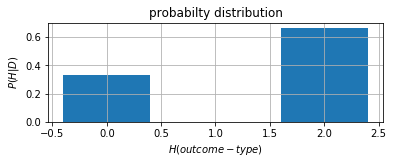

In [11]:
# bayesmontylib.py 2016-05-11 06:16:19 joseph t oettinger
# purpose/description: show probabilties of doors in monty hall problem
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: Making the monty hall problem into a bayes stx problem is forced.  
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

%matplotlib inline

import bayeslib
import bayesinit

def init_uniform_ph():
    """ From the number of hypotheses calculate their initial 
    probability  (priors).
    input: num_h, the number of hypotheses
    return value: ph, a list of num_h probabilites, each == 1/num_h 
    """
    num_h = eval(input('enter number of hypotheses (you enter 3 here - the car could be behind any of 3 doors)'))
    ph = [1/num_h]*num_h
    return (ph)

def init_emptydoor_pdgh(ph):
    """ For each of the doors, set the probability that Monty will open it and
    show that it's empty.
    """
    num_h = len(ph)
    # Create the 3 member array.
    pdgh = [0]*num_h

    # If car is behind doorA, prob monty will pick doorB or doorC at random;
    # so 50% chance he'll pick doorB; so prob of datum (you picked door0 and door 1 is shown to 
    # be empty) given the hypothesis h[0] "car's behind doorA" == 1/2
    pdgh[0] = 1/2

    # If car is _behind_ doorB (h[1]), the prob monty will _pick_ doorB 
    # to show it's empty is 0.
    pdgh[1] = 0

    # If car is behind doorC, prob monty will pick doorB (his only option
    # since you picked doorA) and show it's empty is 1.
    pdgh[2] = 1
    return pdgh


# prior hypothesis: car's equally likely to be behind door 1, 2, or 3
ph =   init_uniform_ph()
pdgh = init_emptydoor_pdgh(ph)
pdgh_t_ph = bayeslib.success_update(ph, pdgh)
phgd = bayeslib.calc_phgd(pdgh_t_ph)
print('phgd is ', phgd)
bayeslib.graph_distro(phgd)


#if __name__ == '__main__':
#    main(*sys.argv)


In [12]:
# monty.py 9-22-08 joseph t oettinger
# purpose/description: check if contestant should switch doors after monty hall reveals location of a goat
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: see michael shermer's column sci am 10-08
#    Monty Hall meets Monty Python
#    For rules of the game, see monty.txt (this is with 3 doors; there
#    are other variations, but this one is simple and demonstrates the
#    principle.
#    It seems your chance of winning if contestant stands pat is 1/3; 
#    if he switches it's 2/3.
#    This simulation program has the contestant decide at random 
#    whether to switch or stay with the first choice. 
#    Another program, montysimp.py, let's him decide to always switch
#    or never switch. Same results, as you would expect.
#    One way of looking at the problem is that the door the contestant
#    picked has a 1/3 chance of being the right door, and a 2/3 chance
#    of being the wrong. So if contestant stands pat, his chance of
#    winning the car is 1/3. If he moves, there's a 1/3 chance he'll
#    leave the right place, so he'll lose the car. But there's a 2/3
#    chance his door is the goat door, and by moving he'll get the 
#    car, because contestant knows where the other goat is and can 
#    avoid that one.
#    The other way of looking at it (evidently the wrong way) is that
#    the car and goats were randomly distributed so there was a 1/3
#    chance of the car being behind the door the contestant chose.
#    Now the contestant knows where one of the goats is, so there's a
#    1/2 chance that the goat's behind the chosen door and 1/2 
#    chance it's behind the door Monty didn't reveal. 
#    Two seemingly plausible scientific (ie testable, falsifiable)
#    theories.
#    How choose the correct one? By the empiric method. Test them.
#    Is writing a computer program and running it a legitimate test? 
#
#    Here's a more detailed rationale for switching:
#    Monty doesn't do anything with what's behind the door the
#    contestant picked, but he eliminates a goat from behind one of
#    the remaining two doors.
#    So in 1/3 of the trials contestant has the car and, if he
#    switches, he'll get a goat.
#    But in two thirds of the trials, he's got a goat and then if he
#    switches, he's certain to get a car (if Monty found a goat and 
#    the car behind the doors contestant didn't choose, he revealed the
#    goat, so it couldn't be behind the door contestant switches to).
#    Here's the situation at the point where you're deciding to switch:
#    The chance that you've picked the right one isn't changed: it's 1/3.
#    The chance that the remaining door has the goat is doubled to 
#    2/3.
#    [This choosing the door with the goat behind it instead of the 
#    door with the car behind it is where the randomness stops. 
#    Monty doesn't look at (or ignores info about) what's behind the 
#    door you chose. He does look at the other 2 doors, and acts on 
#    the info he gets, as above. So the odds of the car being behind 
#    the door you chose first don't change, but the odds of the car 
#    being behind one of the other 2 doors change - they double]
 
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

import random

# Define trial(), the function that runs a series of "shows" where 
# contestant is presented with the doors, the location of a goat is
# revealed, and contestant decides whether to switch or not. 
def trial():
    n = random.random()
# If the random number is in the < 1/3, put car behind door 1, if in upper 1/3, behind
# door 3, if in middle 1/3 behind door 2. 
    if n < .33333:
        carloc = 1
    elif n > .66666:
        carloc = 3
    else:
        carloc = 2

# Put goats behind the other 2 doors.
    if carloc == 1:
        goatloc1 = 2
        goatloc2 = 3
    elif carloc == 2:
        goatloc1 = 1
        goatloc2 = 3
    else:
        goatloc1 = 1
        goatloc2 = 2

#    print "The door with the car behind it is: ", carloc
#    print "The doors with the goats behind them are: ", goatloc1, " and ", goatloc2    


    n = random.random()

#   Randomly guess a door in the same way the car was randomly placed.
    if n < .33333:
        guess1 = 1
    elif n > .66666:
        guess1 = 3
    else:
        guess1 = 2

#    print "The you's first guess is: ", guess1 

    n = random.random()
#   If contestant guessed a goat location, Monty reveals location ofthe other goat.
    if guess1 == goatloc1:
        montyreveals = goatloc2
    elif guess1 == goatloc2:
        montyreveals = goatloc1
#   If contestant guessed the location of the car, Monty randomly picks
#   one of the goats to reveal.
    else:
        if n < .5:
            montyreveals = goatloc1
        else:
            montyreveals = goatloc2

#    print "One of the goats is behind door ", montyreveals


    n = random.random()

#   contestant randomly decide whether to switch or not.
    if n < .5:
        # switchguesses
        switched = True
#        print "contestant decided to switch."
#   contestant picks the remaining door (ie not the one contestant first picked and
#   not the one Monty opened).
        if (guess1 == 1 or montyreveals == 1) and (guess1 == 2 or montyreveals == 2):
            guess2 = 3
        elif (guess1 == 1 or montyreveals == 1) and (guess1 == 3 or montyreveals == 3):
            guess2 = 2
        else:
            guess2 = 1
    else:
        switched = False
        # don't switch guesses
        guess2 = guess1
#        print "contestant sticks with first guess."
 
#    print "The you's second guess is: ", guess2


    if guess2 == carloc:
        won = True
#        print "contestant gets the brand-new automobile!"
    
    else:
        won = False
#        print "baaaaaa!"
    
    trialresult = [switched, won]
    return trialresult

#   Initialize the numbers of switches, standpats and number of
#   successes for each decision.
numberofswitches = 0
numberofgoodswitches = 0
numberofstandpats = 0
numberofgoodstandpats = 0

# Set number of "shows" in the trial. 
# Run the trial.
size_of_trial = 1000001
for i in range(1, size_of_trial):
    trialresult = trial()
    if trialresult[0] == True:
        numberofswitches += 1    
        if trialresult[1] == True:
            numberofgoodswitches += 1
    else:
        numberofstandpats += 1
        if trialresult[1] == True:
            numberofgoodstandpats += 1
# Print the results.
print("number of trials: ", i)
print("number of switches: ", numberofswitches)
print("number of good switches: ", numberofgoodswitches)
print("number of standpats: ", numberofstandpats)
print("number of good standpats: ", numberofgoodstandpats)
switchratio = numberofgoodswitches * 1.0/numberofswitches
print("number of good switches over all switches: ", switchratio)
standratio = numberofgoodstandpats * 1.0/ numberofstandpats
print("number of good standpats over all standpats: ", standratio)
advantage = switchratio/standratio
print("advantage of switching is: ", advantage)


number of trials:  1000000
number of switches:  500424
number of good switches:  333733
number of standpats:  499576
number of good standpats:  166776
number of good switches over all switches:  0.6669004684027944
number of good standpats over all standpats:  0.3338350921581501
advantage of switching is:  1.9976943229409172


In [15]:
#!/usr/bin/python
# montysimp.py 9-22-08 joseph t oettinger
# purpose: check if switching doors improves odds in Monty Hall game
# archive: contact joeoettinger@netscape.net; in /abstxt
# comment: see Michael Shermer's column Sci Am 10-2008
#    His column shows your chance of winning if you stand pat is 1/3; if you
#    switch it's 2/3.
#    This program lets contestant decide to always switch
#    or never switch. Another program, monty.py, lets him decide at
#    random whether to switch or stay with his first choice.  
#    Same results, as you would expect.
# revision log 
# 2016-03-15 07:18:40 2to3 - montysimp.py  
# 9-23-08 Monty reveals other goat if you picked one; reveals (at random)
# one of the 2 if you picked the car; so if you stay, your chance remains 1/3
# but if you switch it's 2/3, since if the wrong pick was one of the
# other 2, Monty's eliminated it.

import random

def trial(switch):
    n = random.random()

    # put car at random behind one of the doors 
    if n < .33333:
        carloc = 1
    elif n > .66666:
        carloc = 3
    else:
        carloc = 2
    # put goat behind the other doors
    if carloc == 1:
        goatloc1 = 2
        goatloc2 = 3
    elif carloc == 2:
        goatloc1 = 1
        goatloc2 = 3
    else:
        goatloc1 = 1
        goatloc2 = 2

#    print "The door with the car behind it is: ", carloc
#    print "The doors with the goats behind them are: ", goatloc1, " and ", goatloc2    


    # contestant selects a door at random
    n = random.random()
    
    if n < .33333:
        guess1 = 1
    elif n > .66666:
        guess1 = 3
    else:
        guess1 = 2

#    print "The contestant's first guess is: ", guess1 

    # If one of the goats is behind the door the contestant chooses,
    # Monty shows the location of the other goat.
    n = random.random()
    if guess1 == goatloc1:
        montyreveals = goatloc2
    elif guess1 == goatloc2:
        montyreveals = goatloc1
    # If a car's behind the door the contestant chooses, Monty chooses
    # one of the doors a goat is behind and shows one of the goats.
    else:
        if n < .5:
            montyreveals = goatloc1
        else:
            montyreveals = goatloc2

#    print "One of the goats is behind door ", montyreveals

    # switchguesses
    if switch == True:
        if (guess1 == 1 or montyreveals == 1) and (guess1 == 2 or montyreveals == 2):
            guess2 = 3
        elif (guess1 == 1 or montyreveals == 1) and (guess1 == 3 or montyreveals == 3):
            guess2 = 2
        else:
            guess2 = 1
#        print "Contestant decides to switch."
    else:
        # don't switch guesses
        guess2 = guess1
#        print "Contestant sticks with first guess."
 
#    print "The contestant's second guess is: ", guess2


    if guess2 == carloc:
        won = True
#        print "You get the brand-new automobile!"
    
    else:
        won = False
#        print "baaaaaa!"
    
    trialresult = [switch, won]
    return trialresult


numberofswitches = 0
numberofgoodswitches = 0

numberofstandpats = 0
numberofgoodstandpats = 0

# Decide strategy - either always switch or never switch.
def choose():
    choice = input("enter 1 to switch always, 0 to stand pat: ")
    if choice == '1':
        switch = True
    elif choice == '0':
        switch = False
    else:
        print("you need to enter 1 or 0")
        switch = choose()
    return switch

# Play the game a thousand times.
switch = choose()
for i in range(1, 1000001):
    trialresult = trial(switch)
    if trialresult[0] == True:
        numberofswitches += 1    
        if trialresult[1] == True:
            numberofgoodswitches += 1
    else:
        numberofstandpats += 1
        if trialresult[1] == True:
            numberofgoodstandpats += 1

print("number of trials: ", i)

if switch == True:
    print("number of switches: ", numberofswitches)
    print("number of good switches: ", numberofgoodswitches)
    switchratio = numberofgoodswitches*1.0/numberofswitches
    print("number of good switches over all switches: ", switchratio)
if switch == False:
    print("number of standpats: ", numberofstandpats)
    print("number of good standpats: ", numberofgoodstandpats)
    standratio = numberofgoodstandpats * 1.0/ numberofstandpats
    print("number of good standpats / all standpats: ", standratio)


enter 1 to switch always, 0 to stand pat:  


you need to enter 1 or 0


enter 1 to switch always, 0 to stand pat:  1


number of trials:  1000000
number of switches:  1000000
number of good switches:  666590
number of good switches over all switches:  0.66659


enter 0 to solve a cookie type problem, 1 for fair coin type of problem


 1
enter number of success updates  2
enter number of failure updates  3


phgd is  [0.0, 5.821794058217941e-05, 0.0002258860822588609, 0.0004928434249284342, 0.0008493465684934658, 0.0012860625128606254, 0.0017940614579406143, 0.0023648096036480966, 0.0029901619499016208, 0.0036623550966235516, 0.004374000043740002, 0.005118074991180751, 0.005887918138879181, 0.006677220486772206, 0.0074800186348001904, 0.008290687582906875, 0.009103933531039337, 0.009914786679147868, 0.010718594027185944, 0.011511012175110129, 0.012288000122880009, 0.013045812070458124, 0.013780990217809907, 0.014490357564903583, 0.01517101071171011, 0.01582031265820313, 0.01643588560435886, 0.017015603750156046, 0.01755758609557587, 0.01806018924060189, 0.018522000185220003, 0.018941829129418292, 0.01931870227318702, 0.019651854616518548, 0.019940722759407226, 0.020184937701849377, 0.02038431764384318, 0.020538860785388614, 0.02064873812648739, 0.02071428626714287, 0.02073600020736, 0.020714526147145276, 0.02065065428650656, 0.02054531162545313, 0.020399554763995558, 0.020214562702145642, 

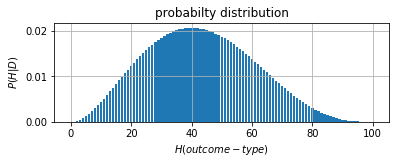

In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals
# bayes_updater4lib.py joseph t oettinger 2016-03-24 07:00:12   
# purpose/description: choose either a cookie-jar type of problem  
# or a coin-bias type problem.
# archive: https://github.com/joeoettinger/my_bayes/blob/master/secondnotebook.ipynb 
# contact: joeoettinger@gmail.com
# comments:
# The two types of distributions are represented by 
# (a) probabilty of having slected one of 2 urns with varying proportions
# of black and white marbles
# (b) probability of having chosen a coin with a given bias (expressed in
# % heads from 0 to 100%).
# The program uses Bayes equation and bayesian updating of probability distros. 
# It's written to help myself and others understand them.
# To write or understand a program like this some basic of Bayes and Python
# are required. One place you can get them from is in a book Think Bayes
# by Allen Downey which is available free online at:
# http://greenteapress.com/wp/think-bayes/
#
# The variables in the program suggest the terms of bayes equation:
# P(H|D) = (P(D|H) * P(H))/P(D)
# ph stands for P(H), the probabilty of the hypothesis ("prior").
# phgd stands for P(H|D), the probabilty of the hypotheis given the data
# (posterior). 
# pdgh stands for  P(D|H), the "likelihood" - ie the probability of the data
# given the hypothesis.
# pd means P(D), the probability of the data
# The program generates the same curve as Downey's on the euro prob, p30 of
# the Think Bayes book.
# (The program gives the user 2 choices:

# Choice (1): 
# The user can input counts of types of hypotheses (eg 2 cookie jars);
# Then the user can input counts of _possible_ successes and failures given 
# each hypothesis (eg 30 vanilla and 10 chocolate cookies in 1st jar, 20 of 
# each in 2nd).
# Then the user can input the outcomes (actual successes and failures) of trials
# (eg a jar was picked randomly and a cookie was picked randomly from it, and 
# it was vanilla).
#
# Choice (2): 
# The user can choose a coin bias initalization. This assigns a 
# bias varying from 0% heads to 100% heads to 101 different hypotheses. 
# Then the user can input results of a series of coin flips (eg 140 heads and
# 110 tails out of 250 flips).
# 
# For either choice, the program calculates a new probability distribution and
# plots its curve using the matplotlib library. 
#
# The program might be extended to permit other choices of initial probability
# distributions:
# (1) The user could just input of ph and pdgh for a set of hypotheses.
# (2) The user could input some uniform distribution, eg the same inital
# probability for all hypotheses. 

# revision log

# use %matplotlib inline to show graph in a jupyter cell
%matplotlib inline

import bayeslib
import bayesinit

print('enter 0 to solve a cookie type problem, 1 for fair coin type of problem')
choice = eval(input())
if choice == 0:
#    ph, pdgh = bayesinit.cookie_initialize()

    ph = bayesinit.init_uniform_ph()
    pdgh = bayesinit.init_count_pdgh(ph)
    phgd = bayeslib.input_calc_updates(ph, pdgh)



elif choice == 1:
#    ph, pdgh = bayesinit.coin_initialize()

#phgd = bayeslib.input_calc_updates(ph, pdgh)

    ph = bayesinit.init_percent_ph()
    pdgh = bayesinit.init_percent_pdgh(ph)
    phgd = bayeslib.input_calc_updates(ph, pdgh)
    print('phgd is ', phgd)


   
bayeslib.graph_distro(phgd)

#if __name__ == '__main__':
#    main(*sys.argv)


In [ ]:
# THIS IS CAM DAVIDSON-PILON'S PROGRAM, AND HIS COMMENTS
# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of the posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

In [ ]:
# coin_cdp_simp3.py 2016-03-19 07:56:56 joseph t oettinger
# purpose/description: mimic Cam's coin-flip example using just plt
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments:
# The hypothesis is about indiv coins and their biases,
# so I think that a pmf() instead of a pdf() is approproate. 
# This program generates the same curves as Cam's on the coin-flip example
# without all the other imported modules.
# todo:
# revision log

#use %matplotlib inline to print graph in a jupyter cell

from __future__ import absolute_import, division, print_function, unicode_literals

%matplotlib inline

import bayeslib
import bayesinit

import matplotlib.pyplot as plt


flips_heads_tuples = [(0,0), (1,0), (2,0), (3,0), (4,1), (5,2), (8,2), (15,5), (50,22), (500,242)]
#print('len(flips_heads_tuples) ', len(flips_heads_tuples))
#print('flips_heads_tuples',flips_heads_tuples)


# List ax contains titles and x and y labels of the subplots that plt draws. 
ax = [0]*10

fig = plt.figure(figsize=(10,10))
for j in range(0,len(flips_heads_tuples)):
    flips, heads = flips_heads_tuples[j]
    ax[j] = fig.add_subplot(5,2,j+1)
    ax[j].set_title('%d flips  %d heads'% (flips,heads))
    ax[j].set_xlabel('H')
    ax[j].set_ylabel('H|D')

# The rest of the program calculates and assigns prob distros
# to each of above flips-heads pairs; then shows the subplots.

# This is initialization for coin probs. Initial likelihood of data
# given the hypothesis.

ph = bayesinit.init_percent_ph()
pdgh = bayesinit.init_percent_pdgh(ph)

# The 
# For a youtube on subplots see: 
# https://www.youtube.com/watch?v=afITiFR6vfw
# The list xs represents the x values (%bias) from 0 to 100% 
xs = [0]*101
for i in range(101):
    xs[i] = i
for j in range(0,len(flips_heads_tuples)):
    x, y =  flips_heads_tuples[j]
    for i in range(0,y): 
        phgd = bayeslib.success_update(ph, pdgh)
        ph = phgd

    for i in range(0,(x-y)):
        phgd = bayeslib.failure_update(ph, pdgh)
        ph = phgd

    # Without this if statement, the phgd in the first subplot is at .0099
    # instead of .01.
    if j == 0:
        for i in range(0, len(ph)):
            ph[i] = round(ph[i],2)
    
    print('plot ', j+1, 'tosses ', x, ' heads ', y)
    # plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    ax[j].plot(xs, ph, label="%d tosses, %d heads" % (x, y))


plt.tight_layout()
plt.show()

#if __name__ == '__main__':
#    main(*sys.argv)

In [ ]:
# bayesdice3.py 2016-06-11 06:32:37  joseph t oettinger
# purpose/description: modify bayesdice2.py so vars are same as in other progs   
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: 
# Gives same results as downey's prog dice_soln.py, which are not same as the
# results he shows in the book! Another program (~/justabs/bayesdice3.py) does
# all updates pre normalizing. That gives same results as this one. 
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline


import bayeslib
import bayesinit

import matplotlib.pyplot as plt


def calc_pdgh_t_ph(pdgh, ph):
    """ calculate a list (distro) of the probabilities of hypotheses given a
    datum, h_h_g_d ie P(H|D) (an outcome of a throw of the die). But the list
    is not normalized - it's "raw". Another function normalizes the list.
    Arguments are pdgh and ph, which are lists of the same length - which
    is the number of hypotheses (5 regular polyhedra).
    Return value is pdgh_t_ph, the list of un-normalized P(H|D).
    """ 
    num_h = len(ph)
    pdgh_t_ph = [0]*num_h
    # for each hypothesis
    for i in range (0, num_h):
        pdgh_t_ph[i] = pdgh[i] * ph[i] 
    return pdgh_t_ph

def calc_phgd(h,d):
    """ Given the 5 regular polyhedra as hypotheses, and an outcome, calculate
    the list of probabilities of the hypotheses.
    """
    ph = [1/len(h)]*len(h)
    for i in range(len(d)):
        datum = d[i]
        pdgh = bayesinit.init_dice_pdgh(h,datum)
        pdgh_t_ph = calc_pdgh_t_ph(pdgh, ph)
        phgd = bayeslib.calc_phgd(pdgh_t_ph) 
        ph = phgd
    return phgd

# list of hypotheses
h = [4, 6, 8, 12, 20]
# list of outcomes (data)
d = [6, 8, 7, 7, 5, 4]

phgd = calc_phgd(h,d)

for i in range(len(phgd)):
    print(h[i], ' ', phgd[i])
    
bayeslib.graph_distro(phgd)
#if __name__ == '__main__':
#    main(*sys.argv)


In [ ]:
# dicelocos1.py 2016-06-12 11:47:57 joseph t oettinger
# purpose/description: a program to solve dice or locomotive problems 
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: the dice part of the program solves the phgd for 6 throws;
# the loco part just solves for seeing one locomotive. But they both use the
# same prior function and the same updating function.
# 
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

import bayeslib
import bayesinit

# dice version
# h[0] == 4 means "the 1st h is that the number of sides on the die is 4". 
h = [4, 6, 8, 12, 20]
num_h = len(h)

# Assign uniform values to members of list ph.
ph = bayesinit.init_uni_ph_w_arg(num_h)
# print("ph ", ph)
# The die could come up a 4, 6, 8, 12 or 20. 
# Those are the possible outcomes.
# Calculate the array pdgh, for the die coming up 6.
datum = 6
  
# For the pdgh array given 1 throw, you use the following likelihood function
# containing a for loop. 
pdgh = bayesinit.init_dice_pdgh(h,datum)
# print("pdgh ", pdgh)

# Now you've got 2 arrays (lists): ph and pdgh.

pdgh_t_ph = bayeslib.dice_loco_update(pdgh,ph)
phgd = bayeslib.calc_phgd(pdgh_t_ph)
#print("phgd ", phgd)
# Reset ph to phgd and restart for loop.
ph = phgd
print("ph after 1 throw resulting in a 6", ph)


# Next step is to nest the above in a for loop using an array that starts with
# an array of of outcomes, substituting d[i] for datum.
d = [6, 8, 7, 7, 5, 4]
h = [4, 6, 8, 12, 20]
ph = bayesinit.init_uni_ph_w_arg(num_h)

for i in range(0,len(d)):
    num_h = 5
    # h[0] == 4 means "the 1st h is that the number of sides on the die is 4". 
    # Assign uniform values to members of list ph.
    # The die could come up a 4, 6, 8, 12 or 20. 
    # Those are the possible outcomes.
    # Calculate the array pdgh, for the die coming up 6.
    datum = d[i]
    # For the pdgh array given 1 throw, you use the following likelihood function
    # containing a for loop. 
    pdgh = bayesinit.init_dice_pdgh(h,d[i])
    # print("pdgh ", pdgh)
    # Now you've got 2 arrays (lists): ph and pdgh.
    pdgh_t_ph = bayeslib.dice_loco_update(pdgh,ph)
    phgd = bayeslib.calc_phgd(pdgh_t_ph)
    # print("phgd ", phgd)
    # Reset ph to phgd and restart for loop.
    ph = phgd
print("ph after 5 throws resulting in 6, 8, 7, 7, 5 and 4", ph)
  
bayeslib.graph_distro(phgd)
    
# loco version
# h[0] == 4 means "the 1st h is that the number of sides on the die is 4". 
h = []
for i in range(1, 1001):
    h.append(i)
num_h = len(h)

# Assign uniform values to members of list ph.
ph = bayesinit.init_uni_ph_w_arg(num_h)

datum = 60

# For the pdgh array given 1 throw, you use the following likelihood function
# containing a for loop. 
pdgh = bayesinit.init_loco_pdgh(h,datum)
pdgh_t_ph = bayeslib.dice_loco_update(pdgh,ph)
phgd = bayeslib.calc_phgd(pdgh_t_ph)
ph = phgd
# print("ph after 1 sighting resulting in a 60", ph)
bayeslib.graph_distro(phgd)

#if __name__ == '__main__':
#    main(*sys.argv)


In [ ]:
# dicelocoscookies.py 2016-06-14 07:19:14  joseph t oettinger
# purpose/description: a program to solve dice or loco and cookie probs! 
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: the dice part of the program solves the phgd for 6 throws;
# the loco part just solves for seeing one locomotive. But they both use the
# same prior function and the same updating function.
# The cookie part just solves for seeing one van
# 
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

import bayeslib
import bayesinit

##### dice version - one throw
# h[0] == 4 means "the 1st h is that the number of sides on the die is 4". 
h = [4, 6, 8, 12, 20]
num_h = len(h)

# Assign uniform values to members of list ph.
ph = bayesinit.init_uni_ph_w_arg(num_h)
# print("ph ", ph)
# The die could come up a 4, 6, 8, 12 or 20. 
# Those are the possible outcomes.
# Calculate the array pdgh, for the die coming up 6.
datum = 6
  
# For the pdgh array given 1 throw, you use the following likelihood function
# containing a for loop. 
pdgh = bayesinit.init_dice_pdgh(h,datum)
# print("pdgh ", pdgh)

# Now you've got 2 arrays (lists): ph and pdgh.

pdgh_t_ph = bayeslib.dice_loco_update(pdgh,ph)
phgd = bayeslib.calc_phgd(pdgh_t_ph)
#print("phgd ", phgd)
# Reset ph to phgd and restart for loop.
ph = phgd
print("ph after 1 throw resulting in a 6", ph)

# dice version - 6 throws
# Next step is to nest the above in a for loop using an array that starts with
# an array of of outcomes, substituting d[i] for datum.
d = [6, 8, 7, 7, 5, 4]
h = [4, 6, 8, 12, 20]
ph = bayesinit.init_uni_ph_w_arg(num_h)

for i in range(0,len(d)):
    num_h = 5
    # h[0] == 4 means "the 1st h is that the number of sides on the die is 4". 
    # Assign uniform values to members of list ph.
    # The die could come up a 4, 6, 8, 12 or 20. 
    # Those are the possible outcomes.
    # Calculate the array pdgh, for the die coming up 6.
    datum = d[i]
    # For the pdgh array given 1 throw, you use the following likelihood function
    # containing a for loop. 
    pdgh = bayesinit.init_dice_pdgh(h,d[i])
    # print("pdgh ", pdgh)
    # Now you've got 2 arrays (lists): ph and pdgh.
    pdgh_t_ph = bayeslib.dice_loco_update(pdgh,ph)
    phgd = bayeslib.calc_phgd(pdgh_t_ph)
    # print("phgd ", phgd)
    # Reset ph to phgd and restart for loop.
    ph = phgd
print("ph after 5 throws resulting in 6, 8, 7, 7, 5 and 4", ph)
  
bayeslib.graph_distro(phgd)

#### loco version
# h[0] == 4 means "the 1st h is that the number of sides on the die is 4". 
h = []
for i in range(1, 1001):
    h.append(i)
num_h = len(h)

# Assign uniform values to members of list ph.
ph = bayesinit.init_uni_ph_w_arg(num_h)

datum = 60

# For the pdgh array given 1 throw, you use the following likelihood function
# containing a for loop. 
pdgh = bayesinit.init_loco_pdgh(h,datum)
pdgh_t_ph = bayeslib.dice_loco_update(pdgh,ph)
phgd = bayeslib.calc_phgd(pdgh_t_ph)
ph = phgd
# print("ph after 1 sighting resulting in a 60", ph)
bayeslib.graph_distro(phgd)


    
#### cookie version
# h[0] == 1 means "the 1st h is that the cookie is in jar 1". 
h = []
for i in range(1, 3):
    h.append(i)
num_h = len(h)

# Assign uniform values to members of list ph.
ph = bayesinit.init_uni_ph_w_arg(num_h)

# For the pdgh array given 1 throw, you use the following likelihood function
# containing a for loop. 
pdgh = pdgh = bayesinit.init_count_pdgh(ph)
# The function could be renamed dice_loco_cookie_update(pdgh,ph)
pdgh_t_ph = bayeslib.dice_loco_update(pdgh,ph)
phgd = bayeslib.calc_phgd(pdgh_t_ph)
ph = phgd
bayeslib.graph_distro(phgd)

#if __name__ == '__main__':
#    main(*sys.argv)


bayestree_hd.txt 2015-09-16 07:48:38 joseph t oettinger
purpose/description: make a tree diagram of bayes equation terms 
archive: ~/justabs
comments: compare this to the 4 rectangles in georect6c.ggb







             --- p(D|H)   ->    p(D|H)*p(H) = p(H&D) = p(D&H)
             |                 
    ---p(H)---
    |        |
    |        --- p(~D|H)  ->    p(~D|H)*p(H) = p(H&~D) = p(~D&H) 
    |
1 ---
    |
    |         --- p(D|~H) ->    p(D|~H)*p(~H) = p(~H&D) = p(D&~H)
    |         |
    ---p(~H)---
              |
              ---- p(~D|~H) ->  p(~D|~H)*p(~H) = p(~H&~D) = p(~D&~H)


Bayes equation 

p(H|D) = (p(D|H)*p(H))/p(D)

can be equivalently expressed by

p(H|D) = p(D&H)/(p(D&~H) + p(D&H))

The the denominator p(D) is the sum of
the probability of the data when the hypothesis is true 
plus 
the probability of the data when the hypothesis is false. 

This is the simplest distribution, with just 2 hypotheses H and ~H. You could create
more complex ones, with more hypotheses H0, H1, H2 ... Hn.

Then the denominator is the sum of the probabilities of the data for all of the hypotheses.




In [ ]:
# cumulative_probabilty.py 2016-04-13 15:30:38 joseph t oettinger
# purpose/description: calculate the cumulative probs from a prob distro
# archive: contact joeoettinger@gmail.com; in ~/justabs 
# comments: 
# revision log
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt

def cum_p_h_g_d(p_h_g_d):
    """Given a list containing the values of a probability distribution,
    calculate a cumulative probabilty distribution.
    """
    num_h = len(p_h_g_d)
    cum_p_h_g_d = [0]*num_h
    for i in range(num_h):
        cum_p_h_g_d[i] = cum_p_h_g_d[i-1] + p_h_g_d[i]
    return cum_p_h_g_d

def graph_distro(p_h_g_d):
    """Graph the probability distribution produced by applying Bayes theorem.
    """
    x = []
    y = p_h_g_d
    for i in range(0, len(y)):
        x.extend([i]) 
    ax2 = plt.subplot(212) # creates second axis
    plt.bar(x,y)
    # could use plt.plot, but that would suggest a continuous distribution
    plt.grid()
    plt.xlabel('$H (outcome-type)$')
    plt.ylabel('$P(H|D)$')
    plt.title('probabilty distribution')
    plt.show()

# P(H|D) for coin that comes up 3 heads on 4 flips
p_h_g_d= [0.0, 1.9803300418047673e-07, 1.5682613664393307e-06, 5.23887311059261e-06, 1.229004825944292e-05, 2.37539588347794e-05, 4.0614768857377756e-05, 6.380863434700028e-05, 9.422370332239572e-05, 0.0001327001158012994, 0.00018003000380043338, 0.000236957491335506, 0.0003041786944212121, 0.00038234172107123366, 0.0004720466712982386, 0.0005738456371138812, 0.0006882427025288035, 0.0008156939435526325, 0.0009566074281939826, 0.0011113432164604553, 0.0012802133603586373, 0.0014634819038941028, 0.001661364883071413, 0.0018740303258941136, 0.002101598252364738, 0.0023441406744848093, 0.0026016815962548313, 0.0028741970136742993, 0.0031616149147416913, 0.0034638152794544733, 0.0037806300798091, 0.004111843279801011, 0.004457190835424632, 0.004816360694673374, 0.0051889927975396375, 0.005574679076014807, 0.005972963454089257, 0.006383341847752345, 0.006805262164992417, 0.007238124305796804, 0.007681280162151823, 0.008134033618042782, 0.008595640549453972, 0.00906530882436867, 0.009542198302769141, 0.010025420836636635, 0.010514040269951393, 0.01100707243869263, 0.011503485170838568, 0.012002198286366401, 0.012502083597252316, 0.013001964907471476, 0.013500618012998043, 0.013996770701805165, 0.01448910275386496, 0.014976245941148552, 0.015456784027626045, 0.01592925276926652, 0.01639213991403807, 0.016843885201907747, 0.017282880364841602, 0.017707469126804667, 0.018115947203760977, 0.018506562303673528, 0.018877514126504322, 0.01922695436421434, 0.01955298670076355, 0.019853666812110902, 0.020127002366214352, 0.020370953023030814, 0.020583430434516214, 0.020762298244625447, 0.0209053720893124, 0.021010419596529953, 0.02107516038622996, 0.021097266070363285, 0.021074360252879745, 0.02100401852972816, 0.020883768488856348, 0.020711089710211097, 0.020483413765738194, 0.020198124219382396, 0.01985255662708747, 0.019443998536796146, 0.018969689488450146, 0.018426821013990194, 0.017812536637355984, 0.0171239318744862, 0.016358054233318525, 0.015511903213789612, 0.014582430307835102, 0.013566538999389635, 0.012461084764386827, 0.011262875070759282, 0.009968669378438618, 0.00857517913935537, 0.007079067797439125, 0.005476950788618435, 0.0037653955408208355, 0.0019409214739728536, 0.0]

# print(p_h_g_d)

cum_p_h_g_d = cum_p_h_g_d(p_h_g_d)
print(cum_p_h_g_d)
graph_distro(cum_p_h_g_d)



#if __name__ == '__main__':
#    main(*sys.argv)


The rules of probability (A and B are any events; | means given):

P(A&B) == P(A|B)*P(B)       axiom of conditional probability 
P(A&B) == P(B&A)            symbolic logic, conjunction is commutative 
P(A|B)*P(B) == P(B|A)*P(B)  algebra - things equal to the same thing are equal
                            to each other

A and B are any events. H and D are events. eg H - "you picked jar0" is an event and D - "you picked a vanilla cookie" is an event.

So you can rewrite the rule:
P(H|D) * P(D) == P(D|H) * P(H)


Algebra question: how do you get from that to:

    P(H|D) = (P(D|H) * P(H)) / P(D)       P(D) <> 0



EXAMPLE: throw a normal 6-sided die.
Possible outcomes:
1,2,3,4,5,6
What's the chance of getting an even number AND a prime number (in one throw)?

You can get an even number 3 ways: (2,4,6) out of 6 possibilities:
p(even) == 3/6 == 1/2

Out of the 3 even numbers there's only one prime:
p(prime|even) == 1/3

So chance of getting a prime and an even number in one throw is 1/2 * 1/3 = 1/6

But also:
You can get a prime number  4 ways: (1,2,3,5) out of 6 possibilities:
p(prime) == 4/6 == 2/3

Out of the 4 prime numbers there's only one even number:
p(even|prime) == 1/4

So that's the other way of calculating the chance of getting a prime and an even number in one throw is 2/3 * 1/4 == 2/12 == 1/6

And in general, for any events, 
p(A&B) == P(A|B)*P(B) == P(B|A)*P(B)
and in terms of our events, the hypothesis (you picked jar0) and the datum (you picked vanilla from it):
p(H&D) = P(H|D) * P(D) == P(D|H) * P(H)
